## 1.10 Decision Trees

**Decision Trees** (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts a target variable value by learning simple decision rules inferred from the data features.

Advantages:
* Simple to understand and interpret (trees can be visualized)
* Requires little data prep, *e.g.* other models require normalization and dummy variables etc.
* Cost of using tree is logarithmic in the number of data points used to train the tree
* Handles both numerical and categorical data
    * except sklearn implementation does NOT handle categorical variables (for now)
* Handles multi-output problems
* Uses a white box model, whereby if a given situation is observable then the explanation for the condition is easily explained by boolean logic
* Possible to validate a model using statistical tests
* Performs well even if its assumptions are somewhat violated by the 'true' model

Disadvantages:
* DT learners can create over-complex trees that do not generalize the data well, *i.e.* overfitting
    * Use pruning, set maximum depth, or minimum required leaf node samples to avoid problems
* DTs can be unstanble because small data variations might results in completely different trees
    * Avoidable through use of ensemble methods
* Predictions of DTs are neither smooth nor continuous, but piecewise constant approximations, and therefore not good at extrapolation
* Learning an optimal decision tree is known to be an NP-complete problem, therefore practical DT learning algorithms are based on heuristic algorithms which cannot guarantee to return to the globally optimal tree
* Some concepts like XOR / parity / multiplexer problems are hard to learn because DTs do not express them easily
* DT learners create biased trees if some classes dominate, therefore it's recommended to balance the dataset priot to fitting a DT

In [1]:
2+2

4

### 1.10.1 Classification

`DecisionTreeClassifier` is a class capable of performing multi-class classification on a dataset. It takes two inputs:
* an array $X$ of shape `(n_samples, n_features)` holding training values
* an array $Y$ of shape `(n_samples)` holding integer values

Example:

In [2]:
from sklearn import tree

In [3]:
X = [[0,0],[1,1]]
Y = [0,1]

In [4]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)

DecisionTreeClassifier()

In [5]:
clf.predict([[2,2]])

array([1])

The probability of each class can also be predicted:

In [6]:
clf.predict_proba([[2,2]])

array([[0., 1.]])

Another example with the `iris` dataset

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree

In [8]:
iris = load_iris()
X, y = iris.data, iris.target

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

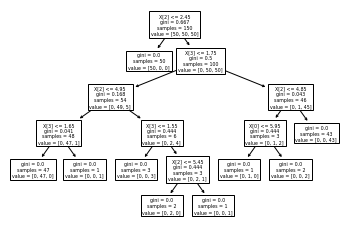

In [10]:
tree.plot_tree(clf)

You can also import `Graphviz` using the `export_graphviz` exporter

In [11]:
import graphviz

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None)

In [13]:
graph = graphviz.Source(dot_data)

In [18]:
#for some reason this code doesn't work:
#
#graph.render("iris") 

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True, special_characters=True)

In [22]:
graph = graphviz.Source(dot_data)

#also doesn't work
#graph

The tree can also be exported in text form with the function `export_text` :

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [25]:
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)

In [26]:
r = export_text(decision_tree, feature_names=iris['feature_names'])

In [27]:
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



###### Example - Plot the decision surface of a decision tree on the iris dataset

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [29]:
#parameters
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

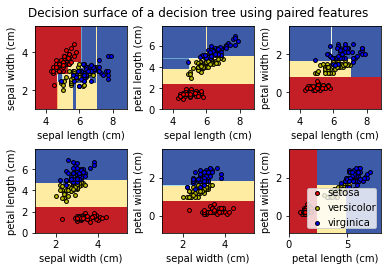

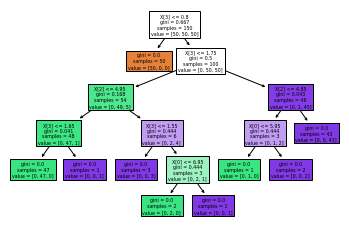

In [33]:
#load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    #we only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    
    #train and plot the decision boundary
    
    clf = DecisionTreeClassifier().fit(X, y)
    
    plt.subplot(2, 3, pairidx + 1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad = 0.5, w_pad=0.5, pad=2.5)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cl = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    #copypasta
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()   

********************

********************

## Understanding the decision tree structure

The structure of a decision tree can be analyzed to better understand the relation between the features and target prediction. This example shows how to retrieve:
* binary tree structure
* depth of each node and whether or not it's a leaf
* nodes reached by a sample using the `decision_path` method
* leaf reached by a samply using the `apply` method
* rules used to predict a sample
* decision path shared by a group of samples



In [35]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Train tree classifier

First fit a `DecisionTreeClassifier` using the `load_iris` dataset

In [36]:
iris = load_iris()

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

### Tree Structure

The decision classifier has an attribute called `tree_` which allows access to low level attributes:
* `node_count` total number of nodes
* `max_depth` of the tree

`tree_` also stores the full binary tree structure, represented as a number of parallel arrays. The $i^{th}$ element of each array holds information about node $i$, and node 0 is thre tree's root. Some arrays only apply to either leaves or split nodes. In this case the values of the other type of nodes is arbitrary; for example, the arrays `feature` and `threshold` only apply to split nodesm therefore the values for leaf nodes in these arrays are arbitrary.

These arrays include:
* `children_left[i]` id of the left child of node `i` or -1 if leaf node
* `children_right[i]` id of the right child of node `i` or -1 if leaf node
* `feature[i]` feature used for splitting node `i`
* `threshold[i]` threshold value at node `i`
* `n_node_samples[i]` number of training samples reaching node `i`
* `impurity[i]` impurity at node `i`

Using these arrays we can traverse the tree structure to compute various properties.

Example:

In [37]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

In [38]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)

In [39]:
#start with root node id (0) and its depth (0)
stack = [(0,0)]

while len(stack) > 0:
    #pop ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    
    #copypasta
    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a leaf node.
		node=4 is a leaf node.


We can compare the above output to the decision tree plot:

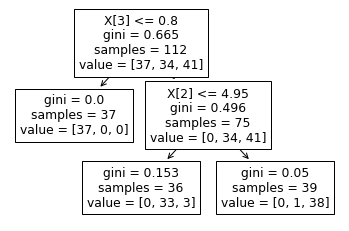

In [40]:
tree.plot_tree(clf)
plt.show()

### Decision Path

The `decision_paths` method outputs an indicator matrix, which lets us retrieve the nodes that specific samples traverse through. A nonzero element in the indicator matrix at position $(i,j)$ means sample $i$goes through node $j$ 

You get the leaf ids reached by samples of interest using the `apply` method, which returns an array of the node ids of the leaves reached. Using leaf ids and `decision_path` we can obtain splitting conditions used at prediction. Note the `node_index` is a sparse matrix.

Example with one sample:

In [41]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

In [42]:
sample_id = 0

#get IDs of the nodes sample_id goes through
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]]

print(f"Rules used to predict sample: {sample_id}")

Rules used to predict sample: 0


In [43]:
#copypasta
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

decision node 0 : (X_test[0, 3] = 2.4) > 0.800000011920929)
decision node 2 : (X_test[0, 2] = 5.1) > 4.950000047683716)


For a group of samples, determine the common nodes the samples go through:

In [44]:
sample_ids = [0,1]

#boolean array indicating the nodes both samples go through
common_nodes = node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids)
common_nodes

array([ True, False,  True, False, False])

In [45]:
#get node IDs from array position
common_node_id = np.arange(n_nodes)[common_nodes]

print(f"The following samples {sample_ids} share the node(s) {common_node_id} in the tree")

The following samples [0, 1] share the node(s) [0 2] in the tree


In [46]:
print(f"This is {(100 * len(common_node_id) / n_nodes)}% of all nodes")

This is 40.0% of all nodes


********************

********************

### 1.10.2 Regression

DTs can also be applied to regression problems via the `DecisionTreeRegressor` class. Similar to classification, the `fit(X, y)` method takes arrays `X` and `y`, except now `y` is expected to have floating point values rather than integers

In [47]:
from sklearn import tree
X = [[0,0],[2,2]]
y = [0.5, 2.5]

In [49]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)

clf.predict([[1,1]])

array([0.5])

###### Example - Decision Tree Regression

This exercise demonstrates the sensitivty of the `max_depth` parameter, where the tree learns finer details when set too high and can overfit based on noise

In [50]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [57]:
#create random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis = 0)
y = np.sin(X).ravel()

y[::5] += 3 * (0.5 - rng.rand(16))

In [59]:
import seaborn as sns

In [69]:
#fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [70]:
#predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

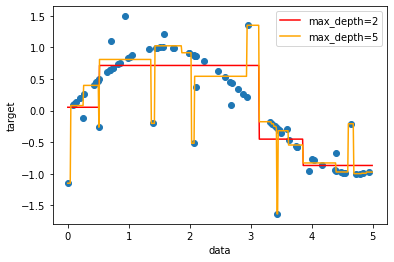

In [83]:
plt.figure()
plt.scatter(X,y)
plt.plot(X_test,y_1, label='max_depth=2',c='red')
plt.plot(X_test,y_2, label='max_depth=5', c='orange')
plt.legend()
plt.xlabel('data')
plt.ylabel('target')
plt.show()

### 1.10.3 Multi-output problems

A multi-output problem is a supervised learning problem with multiple output to predict. That is to say, when $y$ is a 2D array of shape `(n_samples, n_outputs)`

When there's no correlation between outputs, you can just build $n$ independent models for $n$ outputs and use these models to independently predict the $n$ outputs. But it's recommended to build a single model capable of predicting simultaneously all $n$ outputs: (1) Requires lower training time; and (2) Generalization acuracy of resulting estimator may increase

This strategy can be used to support multi-output problems, requiring the following changes:
* Store $n$ output values in leaves instead of 1
* Use splitting criteria that compute average reduction across all $n$ outputs

If a DT is fit on an output array $Y$ of shape `(n_samples, n_outputs)` then the estimator will:
* Output n_output values upon `predict`
* Output a list of n_output arrays of class probabilities upon `predict_proba`

###### Example - Multi-output Decision Tree Regression

In [84]:
import numpy as np
import matplotlib.pyplot

from sklearn.tree import DecisionTreeRegressor

In [86]:
#create random data
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += 0.5 - rng.rand(20, 2)

In [87]:
#fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X,y)
regr_2.fit(X,y)
regr_3.fit(X,y)

DecisionTreeRegressor(max_depth=8)

In [88]:
#predict
X_test = np.arange(-100, 100, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

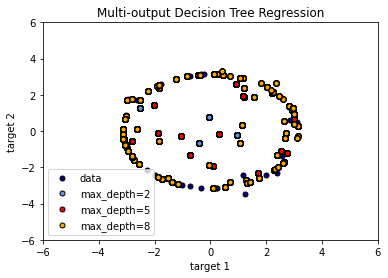

In [89]:
#copypasta
# Plot the results
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(
    y_1[:, 0],
    y_1[:, 1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label="max_depth=2",
)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(
    y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8"
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

###### Example - Face completion with a multi-output estimator

In [90]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [91]:
#load faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]

In [93]:
#test on subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size = (n_faces,))
tet = test[face_ids, :]

In [94]:
n_pixels = data.shape[1]

#upper half of faces
X_train = train[:, : (n_pixels+1) // 2]
X_test = test[:, : (n_pixels+1) // 2]

#lower half
y_train = train[:, n_pixels // 2 :]
y_test = test[:, n_pixels // 2 :]

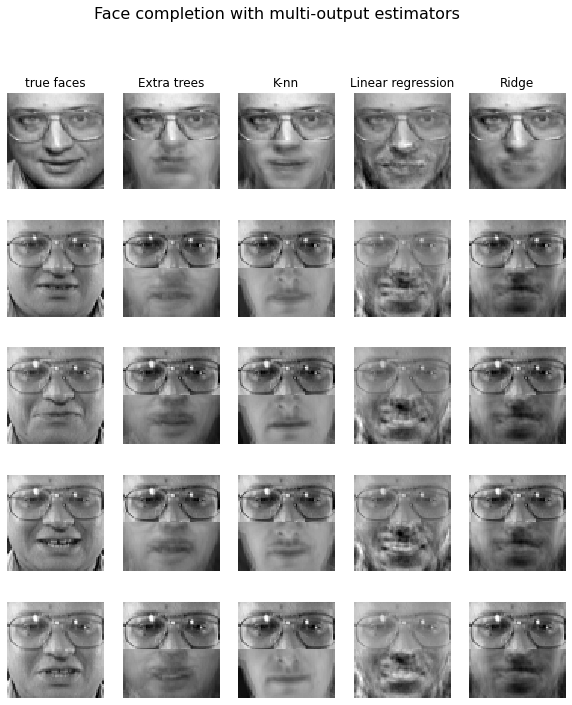

In [95]:
#copypasta
# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

### 1.10.4 Complexity

### 1.10.5 Tips on practical use

* DTs tend to overfit on data with large numbers of features
* Consider dimensionality reduction to give the tree a better chance to find discriminating features
* Understanding the DT structure helps understand how the DT makes decisions, which is important for understanding the important features in the data
* Visualize the tree as you train by using `export` function
* Number of samples to populate the tree doubles for each additional level the tree grows to, so use `max_depth` to control tree size and prevent overfitting
* Use `min_samples_split` or `min_samples_leaf` to ensure multiple samples inform every decision in the tree by controlling which splits are considered
    * For classification with few classes, `min_samples_leaf = 1` is often the best choice
* Balance your dataset before training to prevent tree from biasing toward dominant classes
* If samples are weighted, it's easier to optimize tree structure using weight-based pruning criterion such as `min_weight_fraction_leaf` to ensure leaf nodes contain at least a fraction of the overall sum of sample weights
* All decision trees use `np.float32` arrays internally
* If input matrix $X$ is very sparse, it's recommended to convert to sparse `csc_matrix` before calling fit and sparse `csr_matrix` before calling predict

### 1.10.6 Tree algorithms: ID3, C4.5, C5.0 and CART

### 1.10.7 Mathematical formulation
#### 1.10.7.1 Classification criteria
#### 1.10.7.2 Regression criteria

### 1.10.8 Minimal cost-complexity pruning

###### Example - Post pruning decision trees with cost complexity pruning
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py